# Importing Modules

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np
%matplotlib inline
import seaborn as sns
import sqlite3
print("Imported")

Imported


In [2]:
conn = sqlite3.connect('crimes.db')
cursor = conn.cursor()
print('Connected')

Connected


In [3]:
url = "https://data.sfgov.org/api/views/wg3w-h783/rows.csv?accessType=DOWNLOAD"
crimes = pd.read_csv(url)
print("Loaded")

C:\Users\amara\AppData\Local\Temp\ipykernel_10412\3489585925.py:2: DtypeWarning: Columns (18,21,26) have mixed types. Specify dtype option on import or set low_memory=False.
  crimes = pd.read_csv(url)


Loaded


# Cleaning the Data

## Rewriting Column Names

In [4]:
crimes.columns
crimes.columns = crimes.columns.str.lower().str.replace(" ","_")
crimes.columns

Index(['row_id', 'incident_datetime', 'incident_date', 'incident_time',
       'incident_year', 'incident_day_of_week', 'report_datetime',
       'incident_id', 'incident_number', 'cad_number', 'report_type_code',
       'report_type_description', 'filed_online', 'incident_code',
       'incident_category', 'incident_subcategory', 'incident_description',
       'resolution', 'intersection', 'cnn', 'police_district',
       'analysis_neighborhood', 'supervisor_district',
       'supervisor_district_2012', 'latitude', 'longitude', 'point',
       'data_as_of', 'data_loaded_at', 'neighborhoods',
       'esncag_-_boundary_file',
       'central_market/tenderloin_boundary_polygon_-_updated',
       'civic_center_harm_reduction_project_boundary',
       'hsoc_zones_as_of_2018-06-05', 'invest_in_neighborhoods_(iin)_areas',
       'current_supervisor_districts', 'current_police_districts'],
      dtype='object')

## Parsing Dates

In [5]:
crimes['incident_datetime'] = pd.to_datetime(crimes['incident_datetime'], errors = 'coerce')
crimes['incident_date'] = pd.to_datetime(crimes['incident_date'], errors = 'coerce')
crimes['incident_time'] = pd.to_datetime(crimes['incident_time'], errors = 'coerce')
#crimes['incident_year'] = pd.to_datetime(crimes['incident_year'], errors = 'coerce')
#crimes['Incident Day of Week'] = pd.to_datetime(crimes['Incident Day of Week'], errors = 'coerce')
crimes['report_datetime'] = pd.to_datetime(crimes['report_datetime'], errors = 'coerce')

crimes.head()

C:\Users\amara\AppData\Local\Temp\ipykernel_10412\1577822474.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimes['incident_time'] = pd.to_datetime(crimes['incident_time'], errors = 'coerce')


,row_id,incident_datetime,incident_date,incident_time,incident_year,incident_day_of_week,report_datetime,incident_id,incident_number,cad_number,...,data_as_of,data_loaded_at,neighborhoods,esncag_-_boundary_file,central_market/tenderloin_boundary_polygon_-_updated,civic_center_harm_reduction_project_boundary,hsoc_zones_as_of_2018-06-05,invest_in_neighborhoods_(iin)_areas,current_supervisor_districts,current_police_districts
0,148998204134,2025-06-13 12:41:00,2025-06-13,2025-07-10 12:41:00,2025,Friday,2025-06-13 12:46:00,1489982,250329888,251641497.0,...,2025/06/14 09:37:39 AM,2025/06/15 09:53:25 AM,73.0,NaN,NaN,NaN,NaN,NaN,2.0,9.0
1,149000206224,2025-05-21 00:00:00,2025-05-21,2025-07-10 00:00:00,2025,Wednesday,2025-05-21 08:15:00,1490002,256057940,NaN,...,2025/06/14 09:37:39 AM,2025/06/15 09:53:25 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,148983205043,2025-06-11 08:00:00,2025-06-11,2025-07-10 08:00:00,2025,Wednesday,2025-06-12 11:27:00,1489832,250327597,251630592.0,...,2025/06/13 09:38:27 AM,2025/06/14 09:53:06 AM,26.0,NaN,NaN,1.0,1.0,NaN,11.0,4.0
3,148969503014,2025-06-12 00:09:00,2025-06-12,2025-07-10 00:09:00,2025,Thursday,2025-06-12 00:09:00,1489695,250326840,251630020.0,...,2025/06/13 09:38:27 AM,2025/06/14 09:53:06 AM,53.0,NaN,NaN,NaN,3.0,NaN,2.0,3.0
4,148977109027,2025-05-23 00:00:00,2025-05-23,2025-07-10 00:00:00,2025,Friday,2025-06-12 12:24:00,1489771,250327694,251631515.0,...,2025/06/13 09:38:27 AM,2025/06/14 09:53:06 AM,86.0,NaN,NaN,NaN,NaN,NaN,9.0,2.0


## Finding and Fixing Nulls

In [6]:
cad_null = crimes[crimes['cad_number'].isnull()]
online_null = crimes[crimes['filed_online'].isnull()]
category_null = crimes[crimes['incident_category'].isnull()]
sub_null = crimes[crimes['incident_subcategory'].isnull()]
intersection_null = crimes[crimes['intersection'].isnull()]
cnn_null = crimes[crimes['cnn'].isnull()]
hood_null = crimes[crimes['analysis_neighborhood'].isnull()]
district_null = crimes[crimes['supervisor_district'].isnull()]
district_2012_null = crimes[crimes['supervisor_district_2012'].isnull()]
lat_null = crimes[crimes['latitude'].isnull()]
long_null = crimes[crimes['longitude'].isnull()]
cord_null = crimes[crimes['point'].isnull()]
# Nulls: CAD Number, Incident Category, Incident Subcategory, Intersection (where crime happened), CNN...

In [7]:
crimes.filed_online = crimes.filed_online.fillna(False)
print(crimes.filed_online.unique())

[False  True]


C:\Users\amara\AppData\Local\Temp\ipykernel_10412\2380834180.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  crimes.filed_online = crimes.filed_online.fillna(False)


In [8]:
null_percent = (crimes.isnull().sum().sum() / crimes.size) * 100
print(null_percent)

14.488732188962963


In [9]:
crimes.dropna()
crimes.size

35128429

## Removing Duplicates

In [10]:
crimes.drop_duplicates(subset=['row_id'])
crimes.size

35128429

# SQL Queries - Finding Trends

In [11]:
# to sql table
crimes_sql = crimes.copy()
crimes.to_sql('crimes_sql',conn, if_exists= 'replace',index=False)

949417

In [39]:
# total crimes per year
total_crimes_query = '''SELECT incident_year,COUNT(*) as total_crimes FROM crimes_sql
                        WHERE report_type_code = 'II'
                        GROUP BY incident_year
                        ORDER BY incident_year ASC;'''
cursor.execute(total_crimes_query)
results = cursor.fetchall()
total_crimes = pd.DataFrame(results, columns = ['incident_year', 'total_crimes'])
print(total_crimes)

   incident_year  total_crimes
0           2018        120049
1           2019        115664
2           2020         86803
3           2021         95203
4           2022        102678
5           2023        100503
6           2024         82374
7           2025         37472


In [13]:
# crimes by category
crimes_cat_query = '''SELECT incident_category, COUNT(*) as count
                      FROM crimes_sql
                      WHERE report_type_code = 'II'
                      GROUP BY incident_category
                      ORDER BY count DESC;
                      '''
cursor.execute(crimes_cat_query)
results = cursor.fetchall()
crime_cat = pd.DataFrame(results,columns=['incident_category','count'])
print(crime_cat.head())

     incident_category   count
0        Larceny Theft  245779
1   Malicious Mischief   61823
2  Other Miscellaneous   58463
3              Assault   54229
4             Burglary   42945


In [79]:
# crimes by district
crimes_district_query = '''SELECT police_district, COUNT(*) as count
                           FROM crimes_sql
                           WHERE report_type_code = 'II'
                           GROUP BY police_district
                           ORDER BY count DESC;
                           '''
cursor.execute(crimes_district_query)
results = cursor.fetchall()
crime_district = pd.DataFrame(results,columns=['police_district','count'])
print(crime_district.head())

  police_district   count
0         Central  115523
1        Northern  104640
2         Mission   95964
3        Southern   91037
4      Tenderloin   80628


In [19]:
# crimes by neighborhood
crimes_neighborhood_query = '''SELECT analysis_neighborhood, COUNT(*) AS count
                               FROM crimes_sql
                               WHERE report_type_code = 'II'
                               GROUP BY analysis_neighborhood
                               ORDER BY count DESC;
                               '''
cursor.execute(crimes_neighborhood_query)
results = cursor.fetchall()
crime_neighborhood = pd.DataFrame(results, columns = ['analysis_neighborhood','count'])
print(crime_neighborhood.head())

            analysis_neighborhood  count
0                      Tenderloin  78566
1                         Mission  77210
2                 South of Market  66481
3  Financial District/South Beach  52242
4           Bayview Hunters Point  37439


In [38]:
# arrest vs non-arrest
arrest_type = crimes.resolution.unique()
print(arrest_type)
arrest_query = '''SELECT
                     CASE
                         WHEN resolution = 'Open or Active' THEN 'Non-Arrest'
                         WHEN resolution = 'Exceptional Adult' THEN 'Arrest'
                         WHEN resolution = 'Unfounded' THEN 'Non-Arrest'
                         WHEN resolution = 'Cite or Arrest Adult' THEN 'Arrest'
                     END AS arrest_status,
                     COUNT(*) as count
                 FROM crimes_sql
                 WHERE report_type_code = 'II'
                 GROUP BY arrest_status
                 ORDER BY count DESC;'''
cursor.execute(arrest_query)
results = cursor.fetchall()
arrests = pd.DataFrame(results, columns = ['resolution','count'])
print(arrests)

['Open or Active' 'Cite or Arrest Adult' 'Unfounded' 'Exceptional Adult']
   resolution   count
0  Non-Arrest  593950
1      Arrest  146796


In [47]:
# crimes by week crimes
crime_day_query = '''SELECT incident_day_of_week, COUNT(*)
                     FROM crimes_sql
                     WHERE report_type_code = 'II'
                     GROUP BY incident_day_of_week
                     ORDER BY
                         CASE incident_day_of_week
                             WHEN 'Sunday' THEN 1
                             WHEN 'Monday' THEN 2
                             WHEN 'Tuesday' THEN 3
                             WHEN 'Wednesday' THEN 4
                             WHEN 'Thursday' THEN 5
                             WHEN 'Friday' THEN 6
                             WHEN 'Saturday' THEN 7
                             ELSE 8
                         END;
'''

cursor.execute(crime_day_query)
results = cursor.fetchall()
crime_day = pd.DataFrame(results,columns=['day_of_week','count'])
print(crime_day)

  day_of_week   count
0      Sunday   99330
1      Monday  103548
2     Tuesday  103067
3   Wednesday  109506
4    Thursday  105316
5      Friday  113780
6    Saturday  106199


In [48]:
# crime category by district
cat_by_district_query = '''SELECT police_district, incident_category, COUNT(*) as count
                           FROM crimes_sql
                           GROUP BY police_district, incident_category;'''
cursor.execute(cat_by_district_query)
results = cursor.fetchall()
cat_district = pd.DataFrame(results, columns = ['police_district','incident_category','count'])
print(cat_district)

    police_district     incident_category  count
0           Bayview                  None    184
1           Bayview                 Arson    430
2           Bayview               Assault   6809
3           Bayview              Burglary   4230
4           Bayview          Case Closure    252
..              ...                   ...    ...
517      Tenderloin     Vehicle Misplaced     23
518      Tenderloin               Warrant   7516
519      Tenderloin  Weapons Carrying Etc    930
520      Tenderloin       Weapons Offence      3
521      Tenderloin       Weapons Offense    946

[522 rows x 3 columns]


# Seaborn Graphs and Plots

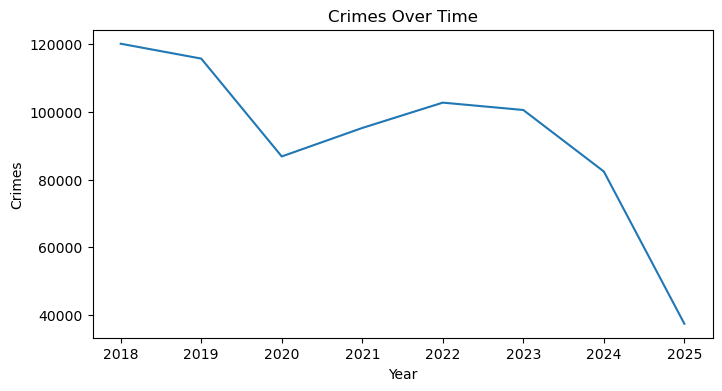

In [69]:
# crimes over time
plt.figure(figsize=(8,4))
plt.title('Crimes Over Time')
sns.lineplot(data = total_crimes,x='incident_year',y='total_crimes')
plt.xlabel('Year')
plt.ylabel('Crimes')
plt.show()

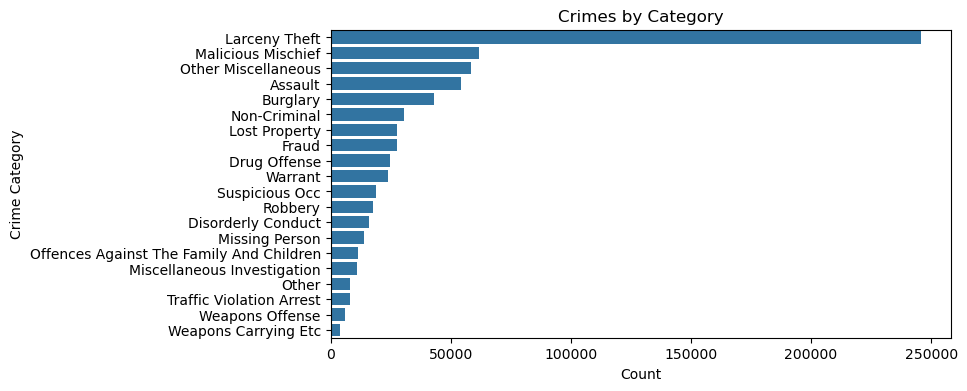

In [117]:
# crimes by category
plt.figure(figsize=(8,4))
plt.title("Crimes by Category")
sns.barplot(data=crime_cat.head(20),x='count',y='incident_category')
plt.xlabel("Count")
plt.ylabel("Crime Category")
plt.show()

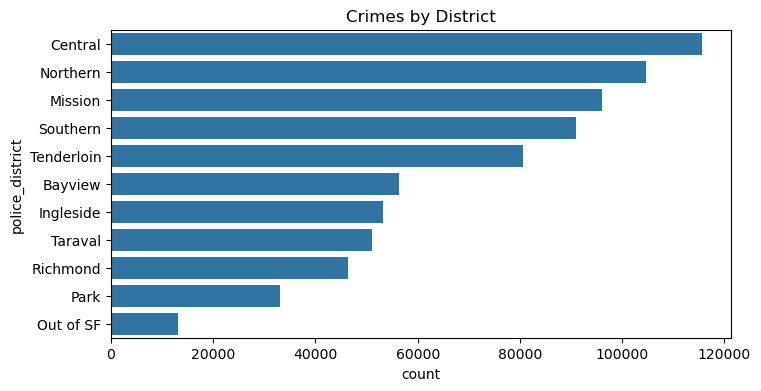

In [81]:
# crimes by district
plt.figure(figsize=(8,4))
plt.title('Crimes by District')
sns.barplot(data=crime_district,x='count',y='police_district')
plt.show()

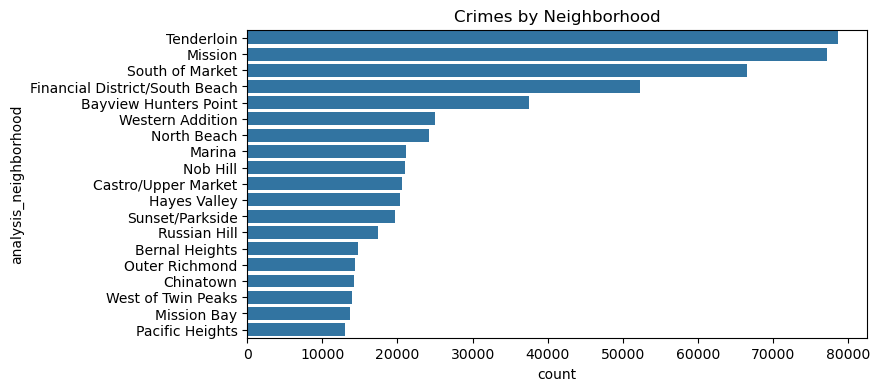

In [85]:
# crimes by district
plt.figure(figsize=(8,4))
plt.title('Crimes by Neighborhood')
sns.barplot(data=crime_neighborhood.head(20),x='count',y='analysis_neighborhood')
plt.show()

   resolution   count  percentage
0  Non-Arrest  593950   80.182681
1      Arrest  146796   19.817319


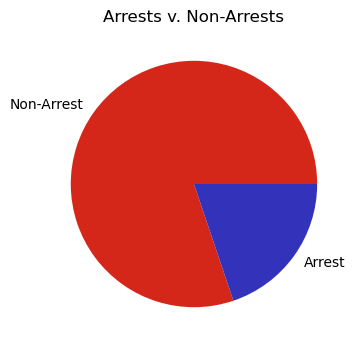

In [103]:
total = arrests.loc[0,'count'] + arrests.loc[1,'count']
non = (arrests.loc[0,'count'] / total) * 100
arr = (arrests.loc[1,'count'] / total) * 100
arrests['percentage'] = [non,arr]
print(arrests)

plt.figure(figsize=(8,4))
plt.title("Arrests v. Non-Arrests")
colors = ['#d42619','#3232ba']
plt.pie(arrests.percentage,labels=arrests.resolution,colors=colors)
plt.show()

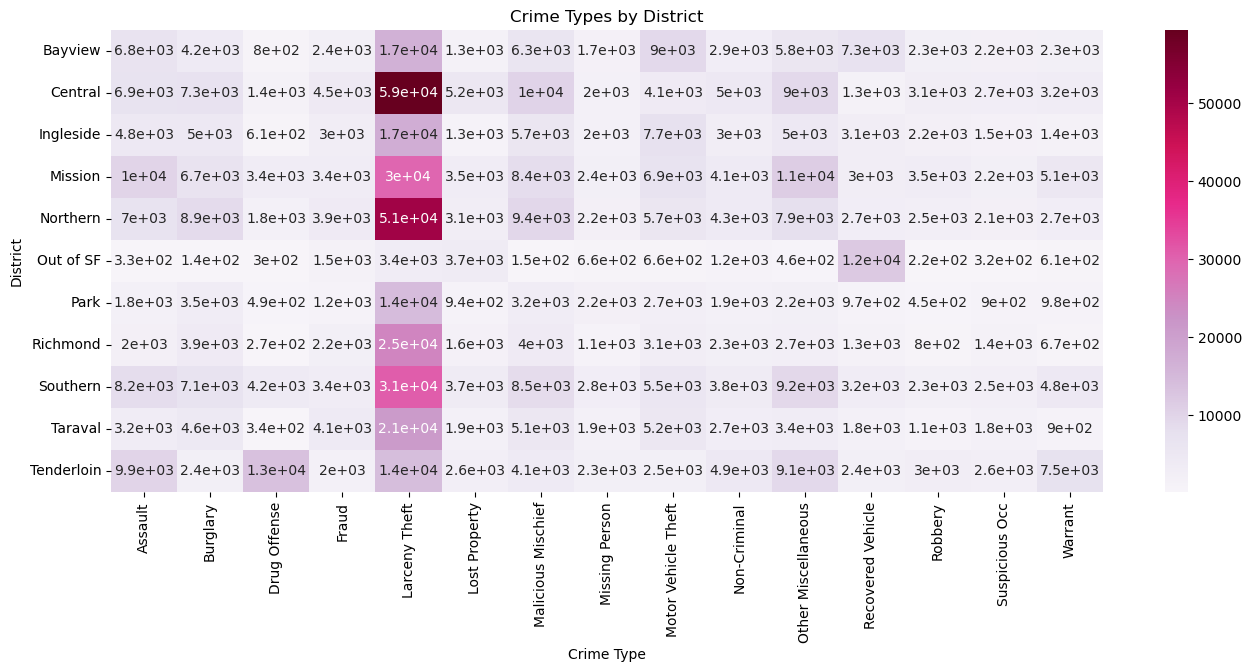

In [138]:
# category - districts
top_categories = (
    cat_district.groupby('incident_category')['count']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)

filtered = cat_district[cat_district['incident_category'].isin(top_categories)]

heat_data = filtered.pivot_table(
    index = 'police_district',
    columns = 'incident_category',
    values = 'count'
)

plt.figure(figsize=(16,6))
plt.title("Crime Types by District")
sns.heatmap(heat_data,annot=True,cmap='PuRd')
plt.xlabel("Crime Type")
plt.ylabel("District")
plt.show()

# Predictions and Analysis